In [1]:
import functools
import subprocess
import pandas as pd
import sys
import yfinance as yf
import concurrent.futures
import logging
from threading import Thread
from threading import RLock
import os 
import json
import path_signature
import matplotlib.pyplot as plt


In [39]:
tickers = pd.read_csv(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade\tickers.csv", header=None)
tickers = tickers.values
print(tickers)
ts = yf.Ticker(tickers[0][0])
hist = ts.history(interval='1d', period='5y')
hist

[['AAAU']
 ['AAXJ']
 ['ACWI']
 ...
 ['ZXM']
 ['ZXM.B']
 ['ZZZD']]


Open       High        Low      Close  \
Date                                                                    
2019-06-24 00:00:00-04:00  14.050000  14.180000  14.040000  14.170000   
2019-06-25 00:00:00-04:00  14.280000  14.340000  14.120000  14.220000   
2019-06-26 00:00:00-04:00  14.080000  14.130000  14.030000  14.080000   
2019-06-27 00:00:00-04:00  14.020000  14.060000  14.010000  14.060000   
2019-06-28 00:00:00-04:00  14.080000  14.100000  14.070000  14.100000   
...                              ...        ...        ...        ...   
2024-06-14 00:00:00-04:00  23.040001  23.110001  22.990000  23.080000   
2024-06-17 00:00:00-04:00  22.990000  23.030001  22.850000  22.950001   
2024-06-18 00:00:00-04:00  22.940001  23.090000  22.900000  23.059999   
2024-06-20 00:00:00-04:00  23.129999  23.389999  23.120001  23.350000   
2024-06-21 00:00:00-04:00  23.309999  23.309999  22.920000  22.980000   

                            Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                        
2019-06-24 00:00:00-04:00    83900        0.0           0.0            0.0  
2019-06-25 00:00:00-04:00   105400        0.0           0.0            0.0  
2019-06-26 00:00:00-04:00    52300        0.0           0.0            0.0  
2019-06-27 00:00:00-04:00    26400        0.0           0.0            0.0  
2019-06-28 00:00:00-04:00     9600        0.0           0.0            0.0  
...                            ...        ...           ...            ...  
2024-06-14 00:00:00-04:00  1726500        0.0           0.0            0.0  
2024-06-17 00:00:00-04:00  1619300        0.0           0.0            0.0  
2024-06-18 00:00:00-04:00  1304600        0.0           0.0            0.0  
2024-06-20 00:00:00-04:00  1422700        0.0           0.0            0.0  
2024-06-21 00:00:00-04:00  2068300        0.0           0.0            0.0  

[1258 rows x 8 columns]

In [67]:
lock = RLock()

yf.set_tz_cache_location(r"C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade")

format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO,
                    datefmt="%H:%M:%S")
#need to make sure items are unique as race conditions are not handled  for multithreading
# keys: ticker name
# values: (info, history)
LE_HISTO = dict() 
def loadHistory(ticker: list, histo: dict, lock:RLock):
    with lock:
        ts = yf.Ticker(ticker[0])
        # get all stock info
        #info = ts.info
        # get historical market data
        hist = ts.history(interval="1d", period='5y')
        histo[ticker[0]] = hist ## to replace with struct
func = lambda x: loadHistory(x, LE_HISTO, lock)
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    #result = executor.map(functools.partial(loadHistory , tickers, LE_HISTO, lock))
    result = executor.map(func, tickers)

22:26:22: AGLB: No data found, symbol may be delisted
22:26:24: AHYG: No data found, symbol may be delisted
22:26:25: ATSX: No price data found, symbol may be delisted (period=5y)
22:26:25: AVFM: No price data found, symbol may be delisted (period=5y)
22:26:26: AZGIW: No data found, symbol may be delisted
22:26:28: BAS500: No data found, symbol may be delisted
22:26:30: BBCD: No data found, symbol may be delisted
22:26:31: BDEQ: No data found, symbol may be delisted
22:26:32: BGEQ: No data found, symbol may be delisted
22:26:32: BGHC: No price data found, symbol may be delisted (period=5y)
22:26:33: BGIF: No data found, symbol may be delisted
22:26:34: BEPR.U: No data found, symbol may be delisted
22:26:36: BESG: No data found, symbol may be delisted
22:26:37: BDIV: No data found, symbol may be delisted
22:26:39: BEPR: No data found, symbol may be delisted
22:26:40: BGRT: No data found, symbol may be delisted
22:26:40: BGU: Period '5y' is invalid, must be one of ['1d', '5d']
22:26:40: 

In [68]:
LE_HISTO

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-06-24 00:00:00-04:00  14.050000  14.180000  14.040000  14.170000   
 2019-06-25 00:00:00-04:00  14.280000  14.340000  14.120000  14.220000   
 2019-06-26 00:00:00-04:00  14.080000  14.130000  14.030000  14.080000   
 2019-06-27 00:00:00-04:00  14.020000  14.060000  14.010000  14.060000   
 2019-06-28 00:00:00-04:00  14.080000  14.100000  14.070000  14.100000   
 ...                              ...        ...        ...        ...   
 2024-06-14 00:00:00-04:00  23.040001  23.110001  22.990000  23.080000   
 2024-06-17 00:00:00-04:00  22.990000  23.030001  22.850000  22.950001   
 2024-06-18 00:00:00-04:00  22.940001  23.090000  22.900000  23.059999   
 2024-06-20 00:00:00-04:00  23.129999  23.389999  23.120001  23.350000   
 2024-06-21 00:00:00-04:00  23.309999  23.309999  22.920000  22.980000   
 
                            

In [69]:
filtered_Histo = dict()
for sym in LE_HISTO:
    if len(LE_HISTO[sym]) != 0:
        filtered_Histo[sym]= LE_HISTO[sym]
filtered_Histo

{'AAAU':                                 Open       High        Low      Close  \
 Date                                                                    
 2019-06-24 00:00:00-04:00  14.050000  14.180000  14.040000  14.170000   
 2019-06-25 00:00:00-04:00  14.280000  14.340000  14.120000  14.220000   
 2019-06-26 00:00:00-04:00  14.080000  14.130000  14.030000  14.080000   
 2019-06-27 00:00:00-04:00  14.020000  14.060000  14.010000  14.060000   
 2019-06-28 00:00:00-04:00  14.080000  14.100000  14.070000  14.100000   
 ...                              ...        ...        ...        ...   
 2024-06-14 00:00:00-04:00  23.040001  23.110001  22.990000  23.080000   
 2024-06-17 00:00:00-04:00  22.990000  23.030001  22.850000  22.950001   
 2024-06-18 00:00:00-04:00  22.940001  23.090000  22.900000  23.059999   
 2024-06-20 00:00:00-04:00  23.129999  23.389999  23.120001  23.350000   
 2024-06-21 00:00:00-04:00  23.309999  23.309999  22.920000  22.980000   
 
                            

In [70]:
#cols = ['Close']#['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
df_histo = pd.DataFrame()#columns=cols)
count = 0
for ticker in filtered_Histo:
    df_temp = pd.DataFrame(filtered_Histo[ticker])
    df_temp[ticker] = df_temp['Close']
    #df_temp = df_temp.filter(cols)
    df_histo = pd.concat([df_histo, df_temp[ticker]], axis=1)
    if (count == 6):
        break

In [71]:
df_histo.to_csv(r'C:\Users\raymo\OneDrive\Desktop\Playground\Financial-Modelling-Playground\Basket Trade\master_price.csv')

In [72]:
df_histo

AAAU       AAXJ        ACWI       ACWX  \
2019-06-24 00:00:00-04:00  14.170000  67.430077   67.277252  40.855934   
2019-06-25 00:00:00-04:00  14.220000  66.778351   66.738380  40.506218   
2019-06-26 00:00:00-04:00  14.080000  67.371719   66.784050  40.646114   
2019-06-27 00:00:00-04:00  14.060000  68.052628   67.039772  40.838455   
2019-06-28 00:00:00-04:00  14.100000  67.887268   67.322906  40.882168   
...                              ...        ...         ...        ...   
2024-06-17 00:00:00-04:00  22.950001  72.220001  112.370003  52.910000   
2024-06-18 00:00:00-04:00  23.059999  72.680000  112.830002  53.200001   
2024-06-20 00:00:00-04:00  23.350000  72.589996  112.599998  53.200001   
2024-06-21 00:00:00-04:00  22.980000  72.129997  112.150002  52.889999   
2024-06-22 00:00:00-04:00        NaN        NaN         NaN        NaN   

                               AEPGX        AFK        AGG        AGQ  \
2019-06-24 00:00:00-04:00  44.222191  18.060242  98.596832  25.200001   
2019-06-25 00:00:00-04:00  43.919765  17.888393  98.614540  24.830000   
2019-06-26 00:00:00-04:00  44.062580  18.060242  98.393112  24.600000   
2019-06-27 00:00:00-04:00  44.255798  18.060242  98.667671  24.459999   
2019-06-28 00:00:00-04:00  44.432220  18.084789  98.623375  24.650000   
...                              ...        ...        ...        ...   
2024-06-17 00:00:00-04:00  57.139999  15.690000  97.570000  38.310001   
2024-06-18 00:00:00-04:00  57.230000  15.850000  97.919998  38.459999   
2024-06-20 00:00:00-04:00  57.520000  15.950000  97.750000  41.360001   
2024-06-21 00:00:00-04:00  57.200001  15.910000  97.760002  38.270000   
2024-06-22 00:00:00-04:00        NaN        NaN        NaN        NaN   

                               AGTHX       AIEQ  ...       XXXX        YCL  \
2019-06-24 00:00:00-04:00  37.127228  25.197258  ...        NaN  58.669998   
2019-06-25 00:00:00-04:00  36.647835  24.928997  ...        NaN  58.810001   
2019-06-26 00:00:00-04:00  36.655212  24.966364  ...        NaN  58.130001   
2019-06-27 00:00:00-04:00  36.905968  25.053551  ...        NaN  58.160000   
2019-06-28 00:00:00-04:00  37.127228  25.252979  ...        NaN  58.090000   
...                              ...        ...  ...        ...        ...   
2024-06-17 00:00:00-04:00  73.809998  36.040001  ...  43.000000  21.139999   
2024-06-18 00:00:00-04:00  73.849998  36.049999  ...  43.380001  21.129999   
2024-06-20 00:00:00-04:00  73.660004  36.070000  ...  42.849998  20.830000   
2024-06-21 00:00:00-04:00  73.540001  36.078999  ...  42.439999  20.629999   
2024-06-22 00:00:00-04:00        NaN        NaN  ...        NaN        NaN   

                                 YINN        YXI        YYY        ZIV  \
2019-06-24 00:00:00-04:00  422.485626  18.789835  14.723615  72.879997   
2019-06-25 00:00:00-04:00  399.415771  19.100376  14.641357  71.840797   
2019-06-26 00:00:00-04:00  413.202545  18.891354  14.674263  72.180000   
2019-06-27 00:00:00-04:00  427.189117  18.692289  14.731842  72.610001   
2019-06-28 00:00:00-04:00  426.989319  18.692289  14.740066  73.260002   
...                               ...        ...        ...        ...   
2024-06-17 00:00:00-04:00   24.110001  17.070000  12.030000        NaN   
2024-06-18 00:00:00-04:00   24.260000  17.000000  12.050000        NaN   
2024-06-20 00:00:00-04:00   25.059999  16.830000  12.000000        NaN   
2024-06-21 00:00:00-04:00   23.850000  17.090000  12.010000        NaN   
2024-06-22 00:00:00-04:00         NaN        NaN        NaN        NaN   

                                ZJPN         ZSL        ZROZ     ZSB  
2019-06-24 00:00:00-04:00  69.658882  149.440002  122.488792     NaN  
2019-06-25 00:00:00-04:00  69.427933  151.320007  122.920738     NaN  
2019-06-26 00:00:00-04:00  69.297653  152.919998  121.989662     NaN  
2019-06-27 00:00:00-04:00  69.619293  153.800003  123.035919     NaN  
2019-06-28 00:00:00-04:00  69.860893  152.720001  123.170319     NaN  
...           

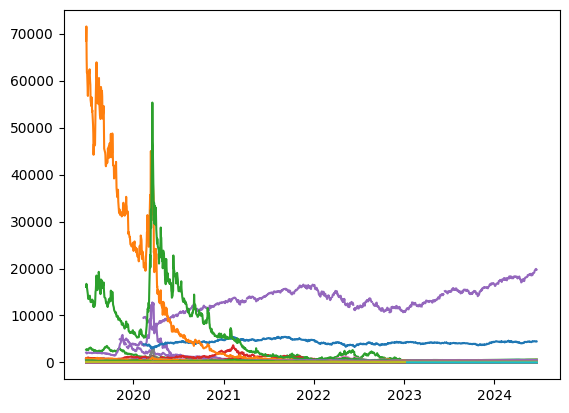

In [73]:
plt.plot(df_histo)
plt.show()

## Data Cleaning

### percent of data present
We first observe the percent prescence of our data (scope decreased to a daily observation versus hourly for better data quality and denoising). 

In [79]:
threshold = 0.999
clean_keys = []
n = len(df_histo)
#for i in df_histo.columns:
clean_pct = df_histo.isnull().sum(axis = 0)/n
clean_names = clean_pct[clean_pct < 1 - threshold].index ## names that are 70% clean 
df_clean = df_histo[clean_names]
df_clean

AAAU       AAXJ        ACWI       ACWX  \
2019-06-24 00:00:00-04:00  14.170000  67.430077   67.277252  40.855934   
2019-06-25 00:00:00-04:00  14.220000  66.778351   66.738380  40.506218   
2019-06-26 00:00:00-04:00  14.080000  67.371719   66.784050  40.646114   
2019-06-27 00:00:00-04:00  14.060000  68.052628   67.039772  40.838455   
2019-06-28 00:00:00-04:00  14.100000  67.887268   67.322906  40.882168   
...                              ...        ...         ...        ...   
2024-06-17 00:00:00-04:00  22.950001  72.220001  112.370003  52.910000   
2024-06-18 00:00:00-04:00  23.059999  72.680000  112.830002  53.200001   
2024-06-20 00:00:00-04:00  23.350000  72.589996  112.599998  53.200001   
2024-06-21 00:00:00-04:00  22.980000  72.129997  112.150002  52.889999   
2024-06-22 00:00:00-04:00        NaN        NaN         NaN        NaN   

                               AEPGX        AFK        AGG        AGQ  \
2019-06-24 00:00:00-04:00  44.222191  18.060242  98.596832  25.200001   
2019-06-25 00:00:00-04:00  43.919765  17.888393  98.614540  24.830000   
2019-06-26 00:00:00-04:00  44.062580  18.060242  98.393112  24.600000   
2019-06-27 00:00:00-04:00  44.255798  18.060242  98.667671  24.459999   
2019-06-28 00:00:00-04:00  44.432220  18.084789  98.623375  24.650000   
...                              ...        ...        ...        ...   
2024-06-17 00:00:00-04:00  57.139999  15.690000  97.570000  38.310001   
2024-06-18 00:00:00-04:00  57.230000  15.850000  97.919998  38.459999   
2024-06-20 00:00:00-04:00  57.520000  15.950000  97.750000  41.360001   
2024-06-21 00:00:00-04:00  57.200001  15.910000  97.760002  38.270000   
2024-06-22 00:00:00-04:00        NaN        NaN        NaN        NaN   

                               AGTHX       AIEQ  ...       YANG        YCS  \
2019-06-24 00:00:00-04:00  37.127228  25.197258  ...  46.479027  36.285000   
2019-06-25 00:00:00-04:00  36.647835  24.928997  ...  48.752354  36.255001   
2019-06-26 00:00:00-04:00  36.655212  24.966364  ...  47.044880  36.665001   
2019-06-27 00:00:00-04:00  36.905968  25.053551  ...  45.565731  36.669998   
2019-06-28 00:00:00-04:00  37.127228  25.252979  ...  45.565731  36.730000   
...                              ...        ...  ...        ...        ...   
2024-06-17 00:00:00-04:00  73.809998  36.040001  ...   8.350000  91.120003   
2024-06-18 00:00:00-04:00  73.849998  36.049999  ...   8.280000  91.220001   
2024-06-20 00:00:00-04:00  73.660004  36.070000  ...   8.000000  92.510002   
2024-06-21 00:00:00-04:00  73.540001  36.078999  ...   8.380000  93.360001   
2024-06-22 00:00:00-04:00        NaN        NaN  ...        NaN        NaN   

                                 XBI      YAFFX        YCL        YINN  \
2019-06-24 00:00:00-04:00  84.524551  15.343959  58.669998  422.485626   
2019-06-25 00:00:00-04:00  84.205330  15.274807  58.810001  399.415771   
2019-06-26 00:00:00-04:00  83.596809  15.267127  58.130001  413.202545   
2019-06-27 00:00:00-04:00  85.741585  15.282492  58.160000  427.189117   
2019-06-28 00:00:00-04:00  87.497314  15.320910  58.090000  426.989319   
...                              ...        ...        ...         ...   
2024-06-17 00:00:00-04:00  90.589996  20.780001  21.139999   24.110001   
2024-06-18 00:00:00-04:00  89.699997  20.840000  21.129999   24.260000   
2024-06-20 00:00:00-04:00  89.889999  20.940001  20.830000   25.059999   
2024-06-21 00:00:00-04:00  92.379997  20.879999  20.629999   23.850000   
2024-06-22 00:00:00-04:00        NaN        NaN        NaN         NaN   

                                 YXI        YYY         ZSL        ZROZ  
2019-06-24 00:00:00-04:00  18.789835  14.723615  149.440002  122.488792  
2019-06-25 00:00:00-04:00  19.100376  14.641357  151.320007  122.920738  
2019-06-26 00:00:00-04:00  18.891354  14.674263  152.919998  121.989662  
2019-06-27 00:00:00-04:00  18.692289  14.731842  153.800003  123.035919  
2019-06-28 00:00:00-04:00  18.692289  14.740066  152.720001  123.17031

In [83]:
## we want names that still trade
#alive_names
alive_names = (~df_histo.iloc[-2,].isnull())
df_alive = df_histo[alive_names[alive_names==True].index].iloc[:-1,]
df_alive
#df_histo.iloc[-2,].isnull()

AAAU       AAXJ        ACWI       ACWX  \
2019-06-24 00:00:00-04:00  14.170000  67.430077   67.277252  40.855934   
2019-06-25 00:00:00-04:00  14.220000  66.778351   66.738380  40.506218   
2019-06-26 00:00:00-04:00  14.080000  67.371719   66.784050  40.646114   
2019-06-27 00:00:00-04:00  14.060000  68.052628   67.039772  40.838455   
2019-06-28 00:00:00-04:00  14.100000  67.887268   67.322906  40.882168   
...                              ...        ...         ...        ...   
2024-06-14 00:00:00-04:00  23.080000  71.699997  111.660004  52.730000   
2024-06-17 00:00:00-04:00  22.950001  72.220001  112.370003  52.910000   
2024-06-18 00:00:00-04:00  23.059999  72.680000  112.830002  53.200001   
2024-06-20 00:00:00-04:00  23.350000  72.589996  112.599998  53.200001   
2024-06-21 00:00:00-04:00  22.980000  72.129997  112.150002  52.889999   

                               AEPGX        AFK        AGG        AGQ  \
2019-06-24 00:00:00-04:00  44.222191  18.060242  98.596832  25.200001   
2019-06-25 00:00:00-04:00  43.919765  17.888393  98.614540  24.830000   
2019-06-26 00:00:00-04:00  44.062580  18.060242  98.393112  24.600000   
2019-06-27 00:00:00-04:00  44.255798  18.060242  98.667671  24.459999   
2019-06-28 00:00:00-04:00  44.432220  18.084789  98.623375  24.650000   
...                              ...        ...        ...        ...   
2024-06-14 00:00:00-04:00  56.930000  15.600000  97.919998  38.570000   
2024-06-17 00:00:00-04:00  57.139999  15.690000  97.570000  38.310001   
2024-06-18 00:00:00-04:00  57.230000  15.850000  97.919998  38.459999   
2024-06-20 00:00:00-04:00  57.520000  15.950000  97.750000  41.360001   
2024-06-21 00:00:00-04:00  57.200001  15.910000  97.760002  38.270000   

                               AGTHX       AIEQ  ...        XBI      YAFFX  \
2019-06-24 00:00:00-04:00  37.127228  25.197258  ...  84.524551  15.343959   
2019-06-25 00:00:00-04:00  36.647835  24.928997  ...  84.205330  15.274807   
2019-06-26 00:00:00-04:00  36.655212  24.966364  ...  83.596809  15.267127   
2019-06-27 00:00:00-04:00  36.905968  25.053551  ...  85.741585  15.282492   
2019-06-28 00:00:00-04:00  37.127228  25.252979  ...  87.497314  15.320910   
...                              ...        ...  ...        ...        ...   
2024-06-14 00:00:00-04:00  73.070000  35.701000  ...  91.750000  20.719999   
2024-06-17 00:00:00-04:00  73.809998  36.040001  ...  90.589996  20.780001   
2024-06-18 00:00:00-04:00  73.849998  36.049999  ...  89.699997  20.840000   
2024-06-20 00:00:00-04:00  73.660004  36.070000  ...  89.889999  20.940001   
2024-06-21 00:00:00-04:00  73.540001  36.078999  ...  92.379997  20.879999   

                                XXXX        YCL        YINN        YXI  \
2019-06-24 00:00:00-04:00        NaN  58.669998  422.485626  18.789835   
2019-06-25 00:00:00-04:00        NaN  58.810001  399.415771  19.100376   
2019-06-26 00:00:00-04:00        NaN  58.130001  413.202545  18.891354   
2019-06-27 00:00:00-04:00        NaN  58.160000  427.189117  18.692289   
2019-06-28 00:00:00-04:00        NaN  58.090000  426.989319  18.692289   
...                              ...        ...         ...        ...   
2024-06-14 00:00:00-04:00  41.709999  21.280001   23.250000  17.280001   
2024-06-17 00:00:00-04:00  43.000000  21.139999   24.110001  17.070000   
2024-06-18 00:00:00-04:00  43.380001  21.129999   24.260000  17.000000   
2024-06-20 00:00:00-04:00  42.849998  20.830000   25.059999  16.830000   
2024-06-21 00:00:00-04:00  42.439999  20.629999   23.850000  17.090000   

                                 YYY         ZSL        ZROZ     ZSB  
2019-06-24 00:00:00-04:00  14.723615  149.440002  122.488792     NaN  
2019-06-25 00:00:00-04:00  14.641357  151.320007  122.920738     NaN  
2019-06-26 00:00:00-04:00  14.674263  152.919998  121.989662     NaN  
2019-06-27 00:00:00-04:00  14.731842  153.800003  123.035919     NaN  
2019-06-28 00:00:00-04:00  14.740066  152.720001  123.170319     NaN  
...           

we want some interval which has a near 100% presence. Suppose we at least 100 names like this. We can try running this script to find it

In [94]:
len(findGoodNames(win, start_idx, df_alive))

Index(['AAAU', 'AAXJ', 'ACWI', 'ACWX', 'AEPGX', 'AFK', 'AGG', 'AGQ', 'AGTHX',
       'AIEQ',
       ...
       'XBI', 'YAFFX', 'XXXX', 'YCL', 'YINN', 'YXI', 'YYY', 'ZSL', 'ZROZ',
       'ZSB'],
      dtype='object', length=921)


921

In [95]:
# given window length and starting date, we want to find list of names that satisfy this
def findGoodNames(window, start_idx, df_hist)->list:
    snapshot = df_hist.iloc[start_idx:window+start_idx,]
    clean_pct = snapshot.isnull().sum(axis = 0)/len(snapshot)
    clean_names = clean_pct[clean_pct == 0].index ## names that are 100% clean 
    print(clean_names)
    return clean_names

windows = [756, 504, 252, 126]
good_win = 0
for win in windows:
    start_idx = 0
    while(len(findGoodNames(win, start_idx, df_alive))<200 and start_idx + win < len(df_alive)):
        start_idx += 1
    if (start_idx + win < len(df_alive)):
        good_win = win
        break
print("start idx: ", start_idx)
print("window: ", good_win)
        

Index(['AAAU', 'AAXJ', 'ACWI', 'ACWX', 'AEPGX', 'AFK', 'AGG', 'AGQ', 'AGTHX',
       'AIEQ',
       ...
       'YANG', 'YCS', 'XBI', 'YAFFX', 'YCL', 'YINN', 'YXI', 'YYY', 'ZSL',
       'ZROZ'],
      dtype='object', length=809)
start idx:  0
window:  756


In [98]:
## we define our training set as the largest window of good looking values + that has data that exists today
train_names = findGoodNames(good_win, start_idx, df_alive)
train_set = df_alive[train_names].iloc[start_idx:good_win,]
train_set

Index(['AAAU', 'AAXJ', 'ACWI', 'ACWX', 'AEPGX', 'AFK', 'AGG', 'AGQ', 'AGTHX',
       'AIEQ',
       ...
       'YANG', 'YCS', 'XBI', 'YAFFX', 'YCL', 'YINN', 'YXI', 'YYY', 'ZSL',
       'ZROZ'],
      dtype='object', length=809)


AAAU       AAXJ       ACWI       ACWX  \
2019-06-24 00:00:00-04:00  14.170000  67.430077  67.277252  40.855934   
2019-06-25 00:00:00-04:00  14.220000  66.778351  66.738380  40.506218   
2019-06-26 00:00:00-04:00  14.080000  67.371719  66.784050  40.646114   
2019-06-27 00:00:00-04:00  14.060000  68.052628  67.039772  40.838455   
2019-06-28 00:00:00-04:00  14.100000  67.887268  67.322906  40.882168   
...                              ...        ...        ...        ...   
2022-06-15 00:00:00-04:00  18.190001  69.620003  81.480164  43.270508   
2022-06-16 00:00:00-04:00  18.400000  67.559998  79.096748  42.170494   
2022-06-17 00:00:00-04:00  18.250000  67.959999  79.058144  42.066181   
2022-06-21 00:00:00-04:00  18.180000  69.199997  80.823997  42.767914   
2022-06-22 00:00:00-04:00  18.250000  67.940002  80.360825  42.293766   

                               AEPGX        AFK        AGG        AGQ  \
2019-06-24 00:00:00-04:00  44.222191  18.060242  98.596832  25.200001   
2019-06-25 00:00:00-04:00  43.919765  17.888393  98.614540  24.830000   
2019-06-26 00:00:00-04:00  44.062580  18.060242  98.393112  24.600000   
2019-06-27 00:00:00-04:00  44.255798  18.060242  98.667671  24.459999   
2019-06-28 00:00:00-04:00  44.432220  18.084789  98.623375  24.650000   
...                              ...        ...        ...        ...   
2022-06-15 00:00:00-04:00  46.710354  16.741821  94.377663  28.360001   
2022-06-16 00:00:00-04:00  45.375229  16.477577  94.603912  29.129999   
2022-06-17 00:00:00-04:00  45.394302  16.571951  94.594490  28.290001   
2022-06-21 00:00:00-04:00  46.166771  16.496450  94.217377  28.299999   
2022-06-22 00:00:00-04:00  45.642254  16.147270  95.018715  27.639999   

                               AGTHX       AIEQ  ...       YANG        YCS  \
2019-06-24 00:00:00-04:00  37.127228  25.197258  ...  46.479027  36.285000   
2019-06-25 00:00:00-04:00  36.647835  24.928997  ...  48.752354  36.255001   
2019-06-26 00:00:00-04:00  36.655212  24.966364  ...  47.044880  36.665001   
2019-06-27 00:00:00-04:00  36.905968  25.053551  ...  45.565731  36.669998   
2019-06-28 00:00:00-04:00  37.127228  25.252979  ...  45.565731  36.730000   
...                              ...        ...  ...        ...        ...   
2022-06-15 00:00:00-04:00  46.877991  30.737057  ...  12.220000  55.540001   
2022-06-16 00:00:00-04:00  44.963505  29.352345  ...  13.620000  54.160000   
2022-06-17 00:00:00-04:00  45.303463  29.501831  ...  12.890000  56.540001   
2022-06-21 00:00:00-04:00  46.421738  30.192221  ...  11.910000  57.889999   
2022-06-22 00:00:00-04:00  46.305435  30.327940  ...  12.580000  57.560001   

                                 XBI      YAFFX        YCL        YINN  \
2019-06-24 00:00:00-04:00  84.524551  15.343959  58.669998  422.485626   
2019-06-25 00:00:00-04:00  84.205330  15.274807  58.810001  399.415771   
2019-06-26 00:00:00-04:00  83.596809  15.267127  58.130001  413.202545   
2019-06-27 00:00:00-04:00  85.741585  15.282492  58.160000  427.189117   
2019-06-28 00:00:00-04:00  87.497314  15.320910  58.090000  426.989319   
...                              ...        ...        ...         ...   
2022-06-15 00:00:00-04:00  65.680000  18.750000  34.680000   91.629997   
2022-06-16 00:00:00-04:00  63.970001  18.400000  35.509998   81.220001   
2022-06-17 00:00:00-04:00  67.610001  18.330000  33.959999   85.379997   
2022-06-21 00:00:00-04:00  70.029999  18.510000  33.139999   91.870003   
2022-06-22 00:00:00-04:00  71.790001  18.299999  33.310001   86.650002   

                                 YXI        YYY         ZSL        ZROZ  
2019-06-24 00:00:00-04:00  18.789835  14.723615  149.440002  122.488792  
2019-06-25 00:00:00-04:00  19.100376  14.641357  151.320007  122.920738  
2019-06-26 00:00:00-04:00  18.891354  14.674263  152.919998  121.989662  
2019-06-27 00:00:00-04:00  18.692289  14.731842  153.800003  123.035919  
2019-06-28 00:00:00-04:00  18.692289  14.740066  152.720001  123.170319  
...     

# Cointegration

In [105]:
# python 3 program check if a matrix is
# singular or not.
global N
N = 809
 
# Function to get cofactor of mat[p][q] in temp[][].
# n is current dimension of mat[][]
def getCofactor(mat,temp,p,q,n):
    i = 0
    j = 0
     
    # Looping for each element of the matrix
    for row in range(n):
        for col in range(n):
             
            # Copying into temporary matrix only 
            # those element which are not in given 
            # row and column
            if (row != p and col != q):
                temp[i][j] = mat[row][col]
                j += 1
                 
                # Row is filled, so increase row
                # index and reset col index
                if (j == n - 1):
                    j = 0
                    i += 1
 
# Recursive function to check if mat[][] is
# singular or not. */
def isSingular(mat,n):
    D = 0 # Initialize result
     
    # Base case : if matrix contains single element
    if (n == 1):
        return mat[0][0]
         
    temp = [[0 for i in range(N + 1)] for i in range(N + 1)]# To store cofactors
     
    sign = 1 # To store sign multiplier
 
    # Iterate for each element of first row
    for f in range(n):
         
        # Getting Cofactor of mat[0][f]
        getCofactor(mat, temp, 0, f, n)
        D += sign * mat[0][f] * isSingular(temp, n - 1)
         
        # terms are to be added with alternate sign
        sign = -sign
    return D

In [154]:
import seaborn as sns
#sns.heatmap(train_set.corr())
correlated_pairs = []
corr_name_quarantine = []
corr_mat = train_set.corr()
for i in train_set.columns:
    for j in train_set.columns:
        if i == j:
            continue
        if abs(corr_mat.loc[i,j] - 1) < 0.01 or abs(corr_mat.loc[i,j] + 1) < 0.01:
            correlated_pairs.append([i,j])
            corr_name_quarantine.append(j)
print(correlated_pairs)

[['AAAU', 'BAR'], ['AAAU', 'GLD'], ['AAAU', 'GLDM'], ['AAAU', 'IAU'], ['AAAU', 'PHYS'], ['AAXJ', 'GMF'], ['AAXJ', 'XSOE'], ['ACWI', 'AOA'], ['ACWI', 'AOR'], ['ACWI', 'BBUS'], ['ACWI', 'BRMKX'], ['ACWI', 'DIA'], ['ACWI', 'ESG'], ['ACWI', 'ESGU'], ['ACWI', 'ESGV'], ['ACWI', 'ESGG'], ['ACWI', 'FIW'], ['ACWI', 'GSLC'], ['ACWI', 'IJH'], ['ACWI', 'ITOT'], ['ACWI', 'IWB'], ['ACWI', 'IWR'], ['ACWI', 'IWV'], ['ACWI', 'IYY'], ['ACWI', 'MOAT'], ['ACWI', 'PMYYX'], ['ACWI', 'PRBLX'], ['ACWI', 'QUAL'], ['ACWI', 'SCHB'], ['ACWI', 'SCHX'], ['ACWI', 'SPTM'], ['ACWI', 'VFQY'], ['ACWI', 'VO'], ['ACWI', 'VONE'], ['ACWI', 'VTHR'], ['ACWI', 'VT'], ['ACWI', 'VTI'], ['ACWI', 'VV'], ['ACWX', 'BTMKX'], ['ACWX', 'EFAX'], ['ACWX', 'EFA'], ['ACWX', 'EMXC'], ['ACWX', 'ESGD'], ['ACWX', 'FIONX'], ['ACWX', 'GWX'], ['ACWX', 'IDEV'], ['ACWX', 'IEFA'], ['ACWX', 'IQDY'], ['ACWX', 'IXUS'], ['ACWX', 'PDN'], ['ACWX', 'SCHF'], ['ACWX', 'SCHC'], ['ACWX', 'SPDW'], ['ACWX', 'VEA'], ['ACWX', 'VEU'], ['ACWX', 'VSGX'], ['ACWX', 'VS

In [155]:
print('How many unique correlated pairs we have: ', len(correlated_pairs))
#corr_name_quarantine

How many unique correlated pairs we have:  5784


In [156]:
### we remove the names which are highly correlated (numerically causing singular matrix issues) for a non-corr matrix analysis
unCorr_train = train_set[[x for x in train_set.columns if x not in corr_name_quarantine]]
unCorr_train

AFK        AGQ     ANGIX     AQMNX  \
2019-06-24 00:00:00-04:00  18.060242  25.200001  8.651285  6.089251   
2019-06-25 00:00:00-04:00  17.888393  24.830000  8.651285  6.082087   
2019-06-26 00:00:00-04:00  18.060242  24.600000  8.643475  6.031940   
2019-06-27 00:00:00-04:00  18.060242  24.459999  8.643475  6.039104   
2019-06-28 00:00:00-04:00  18.084789  24.650000  8.678756  6.053432   
...                              ...        ...       ...       ...   
2022-06-15 00:00:00-04:00  16.741821  28.360001  8.560547  7.960032   
2022-06-16 00:00:00-04:00  16.477577  29.129999  8.542527  7.992822   
2022-06-17 00:00:00-04:00  16.571951  28.290001  8.533517  7.984624   
2022-06-21 00:00:00-04:00  16.496450  28.299999  8.524504  8.001020   
2022-06-22 00:00:00-04:00  16.147270  27.639999  8.533517  7.902647   

                                 BAB       BATT       BBAX       BBIG  \
2019-06-24 00:00:00-04:00  26.817923   9.893596  42.448746  30.073366   
2019-06-25 00:00:00-04:00  26.894890   9.876040  42.202389  33.330204   
2019-06-26 00:00:00-04:00  26.783716   9.919054  42.429283  32.105827   
2019-06-27 00:00:00-04:00  26.869230   9.919932  42.721008  30.881454   
2019-06-28 00:00:00-04:00  26.886335   9.951534  42.623779  31.017496   
...                              ...        ...        ...        ...   
2022-06-15 00:00:00-04:00  25.165257  13.698669  44.314323  28.160622   
2022-06-16 00:00:00-04:00  25.146683  13.196477  43.457573  28.296663   
2022-06-17 00:00:00-04:00  25.211708  13.559172  43.001850  28.296663   
2022-06-21 00:00:00-04:00  25.084099  13.986964  43.994270  29.248955   
2022-06-22 00:00:00-04:00  25.419426  13.773068  43.547825  28.432705   

                                BFIN     BFMSX  ...       XSMO         XAR  \
2019-06-24 00:00:00-04:00  10.997897  8.488577  ...  36.549850  100.944969   
2019-06-25 00:00:00-04:00  11.120185  8.497396  ...  36.166142  100.259132   
2019-06-26 00:00:00-04:00  11.103883  8.488577  ...  35.752930  100.033791   
2019-06-27 00:00:00-04:00  11.266933  8.497396  ...  36.372757  100.337509   
2019-06-28 00:00:00-04:00  11.405528  8.515970  ...  36.904026  101.816956   
...                              ...       ...  ...        ...         ...   
2022-06-15 00:00:00-04:00   8.663002  8.455536  ...  46.000000  100.570000   
2022-06-16 00:00:00-04:00   8.598765  8.455536  ...  43.610001   96.260002   
2022-06-17 00:00:00-04:00   8.580411  8.446214  ...  43.290001   97.580002   
2022-06-21 00:00:00-04:00   8.672180  8.446214  ...  44.080002   99.120003   
2022-06-22 00:00:00-04:00   8.672180  8.464859  ...  43.480000   98.820000   

                                XYLD       YANG        YCS        XBI  \
2019-06-24 00:00:00-04:00  43.463997  46.479027  36.285000  84.524551   
2019-06-25 00:00:00-04:00  43.242954  48.752354  36.255001  84.205330   
2019-06-26 00:00:00-04:00  42.960037  47.044880  36.665001  83.596809   
2019-06-27 00:00:00-04:00  43.136864  45.565731  36.669998  85.741585   
2019-06-28 00:00:00-04:00  43.189911  45.565731  36.730000  87.497314   
...                              ...        ...        ...        ...   
2022-06-15 00:00:00-04:00  43.410000  12.220000  55.540001  65.680000   
2022-06-16 00:00:00-04:00  42.230000  13.620000  54.160000  63.970001   
2022-06-17 00:00:00-04:00  42.290001  12.890000  56.540001  67.610001   
2022-06-21 00:00:00-04:00  42.270000  11.910000  57.889999  70.029999   
2022-06-22 00:00:00-04:00  42.400002  12.580000  57.560001  71.790001   

                                 YINN        YXI        YYY         ZSL  
2019-06-24 00:00:00-04:00  422.485626  18.789835  14.723615  149.440002  
2019-06-25 00:00:00-04:00  399.415771  19.100376  14.641357  151.320007  
2019-06-26 00:00:00-04:00  413.202545  18.891354  14.674263  152.919998  
2019-06-27 00:00:00-04:00  427.189117  18.692289  14.731842  153.800003  
2019-06-28 00:00:00-04:00  426.989319  18.692289  14.740066  152.720001  
...                               ...        

<Axes: >

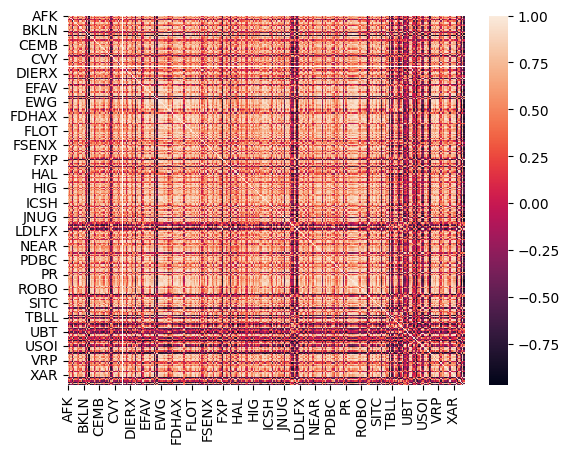

In [157]:
sns.heatmap(unCorr_train.corr())

In [158]:
## we run a variety of different cointegration tests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
# Perform the Johansen Cointegration Test with a specified number of zero
specified_number = 0  # Testing for zero cointegrating relationships
coint_test_result = coint_johansen(unCorr_train, specified_number, 1)

# Extract the trace statistics and eigen statistics
trace_stats = coint_test_result.lr1
eigen_stats = coint_test_result.lr2

# Print the test results
print("Johansen Cointegration Test Results (Testing for Zero Cointegrating Relationships):")
print(f"Trace Statistics: {coint_test_result.lr1}")
print(f"Critical Values: {coint_test_result.cvt}")

# Define stock pairs
stock_pairs = [('AAPL', 'AMZN'), ('MSFT', 'AAPL'), ('AMZN', 'MSFT')]

# Separate the output sections
print("\n" + "-" * 50 + "\n")

# Interpret the results for each pair
for i, (stock1, stock2) in enumerate(stock_pairs):
    trace_statistic = trace_stats[i]
    eigen_statistic = eigen_stats[i]
    print(f"Pair {i + 1} ({stock1} and {stock2}):")
    print(f"Trace Statistic: {trace_statistic}")
    print(f"Eigen Statistic: {eigen_statistic}")
    print("\n" + "-" * 50 + "\n")

# Determine cointegration based on critical values or other criteria
# Add your cointegration assessment logic here
print("Cointegration Assessment: Testing for Zero Cointegrating Relationships (Null Hypothesis)\n")

C:\Users\raymo\AppData\Local\Temp\ipykernel_36860\519251329.py:5: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  coint_test_result = coint_johansen(unCorr_train, specified_number, 1)


LinAlgError: Singular matrix